In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
import yaml
import shutil
from datetime import datetime

sns.set_theme()

In [2]:
### All global variables that would be passed as arguments in a python script
input_csv_file = "/home/nils/Downloads/latency_per_task_buffer.csv"

def remove_duplicate_first_lines_large_file(file_path):
    temp_file_path = file_path + ".temp"
    # Open the original file and a temporary file for writing
    with open(file_path, 'r') as original_file, open(temp_file_path, 'w') as temp_file:
        # Read the first line
        first_line = original_file.readline().strip()

        # Write the first line to the temporary file
        temp_file.write(first_line + '\n')

        # Process the remaining lines
        for line in original_file:
            if line.strip() != first_line:
                temp_file.write(line)

    # Replace the original file with the temporary file
    os.replace(temp_file_path, file_path)
    os.remove(temp_file_path)


remove_duplicate_first_lines_large_file(input_csv_file)

In [4]:

def load_data():
    df = pd.read_csv(input_csv_file, dtype={'OriginId': int, 'NumberOfInputTuples': int, 'TimeDifference': float,
                                            'Selectivity': int, 'ProviderName': str, 'NumberOfWorkerThreads': int,
                                            'Skewness': float})
    # Remove rows that are equal to the header
    header = df.columns.tolist()
    print(header)

    # Converting some columns to float
    #for col in ['TimeDifference', 'NumberOfInputTuples','Selectivity','NumberOfWorkerThreads','Skewness', 'OriginId']:
    #    df[col] = df[col].astype(float).fillna(0.0)
    #df['LatencyInUS'] = df['EndTimeInUs'] - df['StartTimeInUs']

    #df = df.sort_values(by='SequenceNumber').reset_index(drop=True)
    return df

df = load_data()
df

['OriginId', 'NumberOfInputTuples', 'TimeDifference', 'Selectivity', 'ProviderName', 'NumberOfWorkerThreads', 'Skewness']


,OriginId,NumberOfInputTuples,TimeDifference,Selectivity,ProviderName,NumberOfWorkerThreads,Skewness
0,1,0,0.0,10,Compilation,8,0.0
1,1,0,0.0,10,Compilation,8,0.0
2,1,0,0.0,10,Compilation,8,0.0
3,1,0,0.0,10,Compilation,8,0.0
4,1,0,0.0,10,Compilation,8,0.0
...,...,...,...,...,...,...,...
49795951,6,1796,0.0,90,Compilation,8,0.0
49795952,7,1801,0.0,90,Compilation,8,0.0
49795953,15,1804,0.0,90,Compilation,8,0.0
49795954,14,2701,0.0,90,Compilation,8,0.0


['OriginId', 'NumberOfInputTuples', 'TimeDifference', 'Selectivity', 'ProviderName', 'NumberOfWorkerThreads', 'Skewness']


/tmp/ipykernel_82758/3515675266.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/nils/jupyter_notebook/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


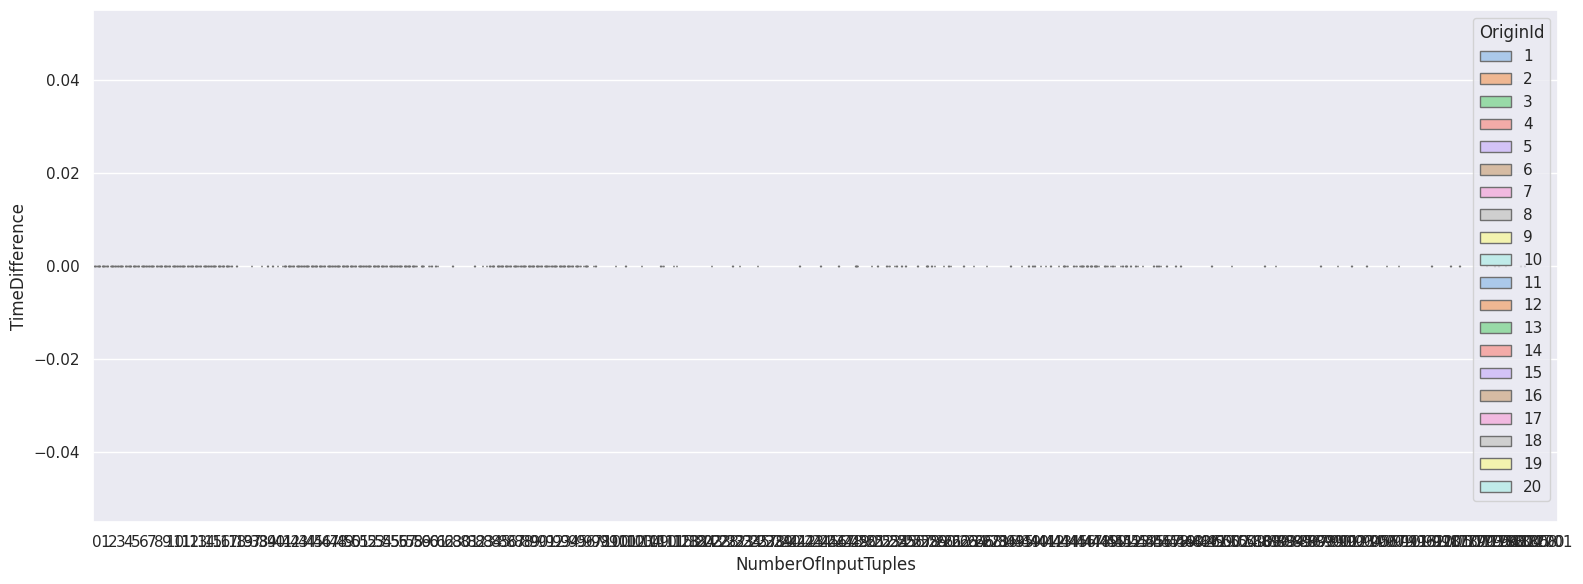

In [6]:
df = load_data()
df = df[df['ProviderName'] == "Compilation"]

# Sort by 'originid' and 'timestamp'

interesting_param = 'NumberOfWorkerThreads'
unique_params = df[interesting_param].unique()
n_params = len(unique_params)
fig, axes = plt.subplots(1, n_params, figsize=(16, 6), squeeze=False, sharey='row')
for idx, param in enumerate(unique_params):
    subset = df[df[interesting_param] == param]  
    
    ax = axes[0][idx]
    sns.boxplot(x='NumberOfInputTuples', hue='OriginId', y='TimeDifference', data=subset, ax=ax, palette="pastel")
    #ax.set_title(f"Latency vs {x_param} for {param} % Selectivity")
    #ax.set_xlabel(x_param)
    #ax.set_ylabel(y_param_units[0])
    #ax.set_ylim([0, .04])

plt.tight_layout()
#plt.savefig(os.path.join(output_folder_plots, f"plots.png"))
plt.show()
plt.close()

In [ ]:
df = load_data()
df = df[df['ProviderName'] == "Compilation"]


interesting_param = "Selectivity"
x_param="NumberOfTuplesInput"
y_params = ["LatencyInUS"]
y_param_units = ["Latency [us]"]
hue="NumberOfWorkerThreads"


unique_params = df[interesting_param].unique()
n_params = len(unique_params)
fig, axes = plt.subplots(1, n_params, figsize=(16, 6), squeeze=False, sharey='row')
for idx, param in enumerate(unique_params):
    subset = df[df[interesting_param] == param]  
    
    ax = axes[0][idx]
    sns.boxplot(x=x_param, y=y_params[0], hue=hue, data=subset, ax=ax, palette="pastel")
    ax.set_title(f"Latency vs {x_param} for {param} % Selectivity")
    ax.set_xlabel(x_param)
    ax.set_ylabel(y_param_units[0])
    #ax.set_ylim([0, .04])

plt.tight_layout()
#plt.savefig(os.path.join(output_folder_plots, f"plots.png"))
plt.show()
plt.close()

In [ ]:
df = load_data()

x_param="SequenceNumber"
y_params = ["NumberOfTuplesInput"]
y_param_units = ["No. Tuples"]
hue="Skewness"


subset = df[df['NumberOfWorkerThreads'] == 1]
subset = subset[subset['Selectivity'] == 10]
subset = subset[['SequenceNumber', 'NumberOfTuplesInput', 'Skewness']]
subset

In [ ]:
df = load_data()

x_param="SequenceNumber"
y_params = ["NumberOfTuplesInput"]
y_param_units = ["No. Tuples"]
#hue="Skewness"


subset = df[df['NumberOfWorkerThreads'] == 1]
subset = subset[subset['Selectivity'] == 10]
subset = subset[['SequenceNumber', 'NumberOfTuplesInput', 'Skewness']]


# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='Skewness', y='NumberOfTuplesInput', data=subset)
plt.title('Number of Tuples for Different Skewness Values')
plt.xlabel('Sequence Number')
plt.ylabel('Number of Tuples Input')
plt.show()


In [ ]:
df = load_data()

x_param="SequenceNumber"
y_params = ["NumberOfTuplesInput"]
y_param_units = ["No. Tuples"]
hue="Skewness"


subset = df[df['NumberOfWorkerThreads'] == 1]
subset = subset[subset['Selectivity'] == 10]
subset = subset[['SequenceNumber', 'NumberOfTuplesInput', 'Skewness']]


# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(x='SequenceNumber', y='NumberOfTuplesInput', hue='Skewness', data=subset, palette='pastel', alpha=0.7)
plt.title('Number of Tuples vs Sequence Number for Different Skewness Values')
plt.xlabel('Sequence Number')
plt.ylabel('Number of Tuples Input')
plt.legend(title='Skewness')
plt.show()